# Исследование успешности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла
### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Примечание
Данные за 2016 год могут быть неполными.

In [143]:
# Импортирование необходимых модулей и атрибутов
import pandas as pd
import os
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [144]:
# Объявим функцию, которая будет читать файлы
def pth_load(pth1, pth2):
    """Sapport using os.path.exists. Load local file in primarily

    :param pth1: local addres of file
    :type pth1: object
    :param pth2: external addres of file
    :type pth2: object
    
    :raises ValueError: if file not found in addresses
    
    :rtype: DataFrame
    :return: foundly file in the form of DataFrame
    """
    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    return df

In [145]:
#Прочитаем файл 'games.csv' и сохраним его в переменной df
df = pth_load('games.csv', '/datasets/games.csv')

#Для получения имформации о наборе данных: 
#вызовем метод 'info()' и напечатаем пять случайных строк таблицы
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9217,Ultimate Muscle - The Kinnikuman Legacy: Legen...,GC,2002.0,Fighting,0.04,0.01,0.08,0.00,NaN,NaN,NaN
833,SOCOM: U.S. Navy SEALs: Combined Assault,PS2,2006.0,Shooter,1.74,0.02,0.00,0.28,72.0,9,T
9805,Destiny: The Collection,XOne,2016.0,Shooter,0.05,0.06,0.00,0.01,NaN,tbd,T
14874,Clannad: Mitsumi Mamoru Sakamichi de - Gekan,PSP,2010.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
11630,ZhuZhu Babies,DS,2011.0,Simulation,0.06,0.01,0.00,0.01,NaN,tbd,E


In [146]:
#Используем метод describe()
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Вывод
В файле содержатся данные о 16715 играх, вышедших в релиз с 1980 по 2016 год. 

Некоторые столбцы содержат пропуски, нужно будет решить, заполнять ли их. Также необходимо изменить тип данных некоторых столбцов. 

## Предобработка данных

### Обработка названий столбцов

In [147]:
#Вызовем метод 'columns', чтобы получить перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Для удобства стоит изменить названия столбцов - привести знаки к нижнему регистру.

In [148]:
#Переименуем названия столбцов на нижний регистр
df.columns = [x.lower() for x in df.columns]

#Проверим результат
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных столбцов

Столбцы 'critic_score' и 'year_of_release' должны иметь тип данных "int". Так как это количественная оценка критиков и год. В столбце 'critic_score' нет значений после запятой, так что мы не потеряем в точности.

Столбец 'user_score' должна иметь тип данных "float", так как это количественная оценка игроков. Но здесь есть один знак после запятой, именно поэтому тип данных "float", в отличии от столбца 'critic_score'.

In [149]:
#Изменим типы данных нужных строк
df[['critic_score']] = df[['critic_score']].astype('Int64')

#Столбец 'year_of_release' изменим на 'Int64'
df[['year_of_release']] = df[['year_of_release']].astype('Int64')

#Столбец 'user_score' содержит значения "tbd". Это может переводиться как "будет определено". 
#Следовательно, сейчас эти значения не известны, их можно удалить. И затем мы сможем сменить тип данных столбца.
#За одно умножим оценку пользователей на 10, чтобы цена шкалы была такой же, как оценка критиков.
df['user_score'] = df['user_score'].replace({'tbd': np.nan})
df[['user_score']] = df[['user_score']].astype('float')*10
df[['user_score']] = df[['user_score']].astype('Int64')

#Проверим результат
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score           Int64
rating              object
dtype: object

Теперь у нас будет немного больше данных, если мы вызовем describe(): у нас будет отображаться столбец 'user_score', который раньше был строкой и не отображался этим методом.

In [150]:
#Используем метод describe()
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,71.250461
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,15.000061
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,64.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,75.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,82.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000


### Обработка пустых значений

В столбце 'name' есть два пустых значения. Посмотрим на них, и удалим.

In [151]:
#Напечатаем строки с неизвестным именем
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,<NA>,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,<NA>,NaN


In [152]:
#Удалим строки с неизвестным именем
df = df.drop(df[df['name'].isnull()].index).reset_index(drop=True)

#Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB


Есть пара сотен строк с неизвестным годом релиза. Возможно, релиз был растянут во времени или был так давно, что никто тогда еще не собирал эти данные. Даты можно восстановить из открытых источников, если найти набор данных c годом релиза игр. Но первичный поиск показал, что таких данных нет. Заполнять их вручную трудоемко, поэтому принимаем решение всвязи с небольшим количеством таких строк оставить их пустыми.

In [153]:
#Напечатаем строки с неизвестным годом релиза
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,85,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,64,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,79,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,NaN


Остались еще пропуски оценок критиков, пользователей и возрастноых рейтингов. Возможно набор данных собирался из разных источников, и в некоторых из них не было данных об оценках игроков, критиков и возрастном рейтинге. Так и возникли пропуски. Их нельзя заполнить вычислениями, средними значениями, это субъективная оценки, которые должны приниматься в каждом случае индивидуально. Пропуски рейтинга мы заполним значением "Not", остальное оставим.

In [154]:
#Заполним пропущенные значения значением "Not"
df = df.fillna({'rating':'Not'})

#Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Int64  
 10  rating           16713 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB


Проверим пул возрастных рейтингов

In [155]:
#Напечатаем уникальные значения в столбце 'rating'
df['rating'].unique()

array(['E', 'Not', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг "K-A" ("Kids to Adults") позже стал называться «E» («Everyone») — «Для всех». Заменим 'K-A' на 'E'

In [156]:
#Заменим все 'K-A' на 'E'
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

#Проверим результат
df[df['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Обработка дубликатов

Проверим набор данных на наличие дубликатов

In [157]:
#Напечатаем количество полных дубликатов и дубликатов по столбцу 'name'
print('Дубликатов:', df.duplicated().sum())
print('Дубликатов в столбце name:', df['name'].duplicated().sum())

Дубликатов: 0
Дубликатов в столбце name: 5154


In [158]:
#Напечатаем обнаруженные дубликаты
df[df['name'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,48,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,32,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,64,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M
...,...,...,...,...,...,...,...,...,...,...,...
16704,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,<NA>,<NA>,T
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,<NA>,Not
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,Not
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,<NA>,Not


Похоже, хоть и есть повторение по именам, но платформы были разными. Технически это действительно разные продукты, так что проверим дубликаты сразу по двум параметрам: имени и платформе

In [159]:
#Напечатаем дубликаты имени и платформы
df[df.duplicated(subset=['name', 'platform'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,55,E
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,85,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,85,T
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,41,E10+
4126,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,41,E10+
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,85,T
11714,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,85,T
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,55,E


Есть дубликаты по имени и платформе. Их нужно будет объединить, точнее сложить продажи. Оценки у них почему-то тоже совпадают. Только придется при объединении учитывать, что "Need for Speed: Most Wanted" 2005 и 2012 годов это разные продукты.

In [160]:
#Переименуем 'Need for Speed: Most Wanted' 2005 и 2012 годов
#Создадим функцию, которая будет переименовывать игру, добавляя к названию год релиза
def rename_this_game(game_name):
    for game_year in df[df['name'] == game_name]['year_of_release'].unique():
        df.loc[
        (df['name'] == game_name) & (df['year_of_release'] == game_year),
        'name'] = df['name'] + ' ' + str(game_year)

#Вызовем функцию
rename_this_game('Need for Speed: Most Wanted')

In [161]:
#Проверим результат
df[df['name'].str.contains(pat = 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted 2005,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,91,T
523,Need for Speed: Most Wanted 2012,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,<NA>,Not
809,Need for Speed: Most Wanted 5-1-0,PSP,2005,Racing,1.77,0.12,0.02,0.17,72,78,E10+
1189,Need for Speed: Most Wanted 2012,X360,2012,Racing,0.62,0.78,0.01,0.15,83,85,T
1590,Need for Speed: Most Wanted 2005,X360,2005,Racing,1.00,0.13,0.02,0.10,83,85,T
1997,Need for Speed: Most Wanted 2005,XB,2005,Racing,0.53,0.46,0.00,0.05,83,88,T
2047,Need for Speed: Most Wanted 2012,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,<NA>,Not
3580,Need for Speed: Most Wanted 2005,GC,2005,Racing,0.43,0.11,0.00,0.02,80,91,T
5971,Need for Speed: Most Wanted 2005,PC,2005,Racing,0.02,0.23,0.00,0.04,82,85,T
6272,Need for Speed: Most Wanted 2013,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,<NA>,Not


При проверке мы обнаружили, что у игры есть еще одна строка "Need for Speed: Most Wanted 5-1-0". Это похоже на версию, в данном случае это версия 2005 года. 

По логике, версии одной игры не должны быть в разных строках, их нужно объединить, но в данном случае эта версия имеет платформу, которой нет в других строках. Поэтому мы можем оставить эту строку, только переименовать.

In [162]:
#Переименуем имя в этой строке
df.loc[df['name'] == 'Need for Speed: Most Wanted 5-1-0', 'name'] = 'Need for Speed: Most Wanted 2005'

#Проверим результат
df[df['name'].str.contains(pat = 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted 2005,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,91,T
523,Need for Speed: Most Wanted 2012,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,<NA>,Not
809,Need for Speed: Most Wanted 2005,PSP,2005,Racing,1.77,0.12,0.02,0.17,72,78,E10+
1189,Need for Speed: Most Wanted 2012,X360,2012,Racing,0.62,0.78,0.01,0.15,83,85,T
1590,Need for Speed: Most Wanted 2005,X360,2005,Racing,1.00,0.13,0.02,0.10,83,85,T
1997,Need for Speed: Most Wanted 2005,XB,2005,Racing,0.53,0.46,0.00,0.05,83,88,T
2047,Need for Speed: Most Wanted 2012,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,<NA>,Not
3580,Need for Speed: Most Wanted 2005,GC,2005,Racing,0.43,0.11,0.00,0.02,80,91,T
5971,Need for Speed: Most Wanted 2005,PC,2005,Racing,0.02,0.23,0.00,0.04,82,85,T
6272,Need for Speed: Most Wanted 2013,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,<NA>,Not


Но остается вероятность, что с другими играми происходит то же самое: множество разных версий в имени. Возможно, даже которые нужно объединить. От таких дубликатов сложно избавиться, при возможности нужно будет иметь это в виду при анализе данных.

Вернемся к дубликатам, о которых мы знаем. Создадим набор данных, в котором соберем дубликаты и получим нужные нам значения.

In [163]:
#Создадим отдельный набор данных, в которое поместим дубликаты
duplicates_df0 = df[df.duplicated(subset=['name', 'platform'], keep = False)]

#Напечатаем результат
duplicates_df0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,55,E
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,41,E10+
4126,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,41,E10+
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,55,E


In [164]:
#Объединим их, сложив значения
duplicates_df = duplicates_df0.groupby('name').sum().reset_index()

#Удалим столбцы 'critic_score' и 'user_score' они нам не будут нужны
duplicates_df = duplicates_df.drop(['critic_score', 'user_score'], axis=1)

#Добавим столбец 'platform'
duplicates_df = duplicates_df.merge(duplicates_df0[['name','platform']], on='name').drop_duplicates().reset_index(drop=True)

#Проверим результат
duplicates_df

,name,year_of_release,na_sales,eu_sales,jp_sales,other_sales,platform
0,Madden NFL 13,4024,2.11,0.23,0.00,0.23,PS3
1,Sonic the Hedgehog,2006,0.41,0.54,0.04,0.66,PS3


Новый набор данных содержит нужную информацию, которую теперь нужно передать обратно в старый набор данных. Сперва удалим дубликаты, затем последнему оставшемуся (уже бывшему дубликату) передадим эти данные.

In [165]:
#Удалим дубликаты в искомом наборе данных. Разумеется, одна строка останется
df = df.drop_duplicates(subset=['name', 'platform']).reset_index(drop=True)

#Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   Int64  
 9   user_score       7588 non-null   Int64  
 10  rating           16711 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB


In [166]:
#Передадим строкам бывших дубликатов в искомом наборе данных значения из нового набора данных
def pass_value(column, n):
    p = duplicates_df[duplicates_df['name'] == n]['platform']
    p
    df.loc[
        (df['name'] == n) & (df['platform'] == duplicates_df[duplicates_df['name'] == n]['platform'].values[0]), 
        column] = duplicates_df[duplicates_df['name'] == name][column].values[0]

#Вызовем функцию для каджого столбца и каждой игры
for name in duplicates_df['name'].unique():
    pass_value('na_sales', name)
    pass_value('eu_sales', name)
    pass_value('jp_sales', name)
    pass_value('other_sales', name)

In [167]:
#Проверим результат для каждой игры. Первую
df[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,58,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,55,E
3985,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,<NA>,73,E
5885,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,73,E
7064,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,67,E


In [168]:
#И вторую
df[df['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,<NA>,<NA>,Not
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.54,0.04,0.66,43,41,E10+
1995,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,44,E10+


### Вычисление общих продаж

Вычислим у каждой игры общие продажи во всех регионах

In [169]:
df['common_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
8947,Shin Chan: ¡Aventuras de Cine!,DS,2008,Platform,0.00,0.00,0.15,0.00,<NA>,<NA>,Not,0.15
8902,Shenmue II,DC,2001,Adventure,0.00,0.00,0.15,0.00,88,94,T,0.15
307,Fallout 3,PS3,2008,Role-Playing,2.15,1.13,0.07,0.59,90,80,M,3.94
14560,Charlie Blasts Territory,N64,1999,Action,0.02,0.01,0.00,0.00,<NA>,<NA>,Not,0.03
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,<NA>,<NA>,Not,4.87


Мы выполнили предобработку данных: заменили названия столбцов, преобразовали столбцы к нужным типам, обработали пропуски и вычислили сумму продаж в регионах по играм.

К сожалению некоторые проблемы не были решены в рамках этого проекта: не полностью заполнены некоторые пропуски и есть вероятность существования дубликатов всвязи с замусоренностью имен игр версиями.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

Text(0, 0.5, 'count')

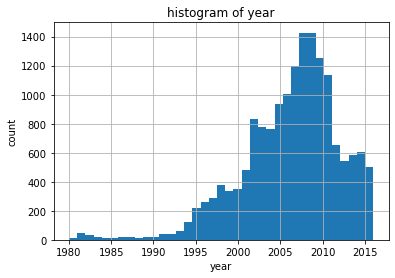

In [170]:
#Построим гистограмму года релиза игр, сразу подберем число корзин
df['year_of_release'].hist(bins=37)
#Зададим название гистограммы, вертикальной и горизонтальной шкалы
plt.title('histogram of year')
plt.xlabel('year')
plt.ylabel('count')

С 1980 до 1993 игры выходили не так часто, но затем началось активное развитие индустрии с пиком в 2008-2009 годах. В начале десятых годов число продаж упало на половину и колеблются примерно в тех значениях до конца периода сбора данных.

Изучим как менялись продажи по платформам. 

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

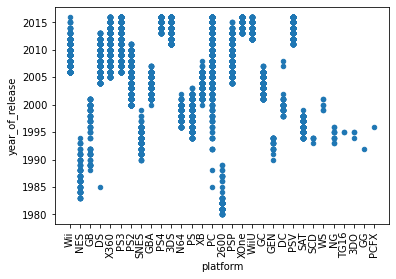

In [171]:
#Визуализируем пересечение платформы и года, чтобы оценить, как распределены игры разных платформ по времени
df.plot(x='platform', y='year_of_release', kind = 'scatter', rot=90) 

Похоже, что в 1985 году есть выброс у платформы DS. Это ошибка в данных. Напечатаем ее

In [172]:
#Выведем на экран этот выброс
df[(df['platform'] == 'DS') & (df['year_of_release'] < 2000)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
15954,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,<NA>,Not,0.02


Судя по всему, это прошедший в Японии турнир по сеги, либо компьютерная игра от учащихся токийского университета, в любом случае Nintendo DS вышла 21 ноября 2004 года, и эта игра не может к относиться к этой платформе. Удалим эту строку.

In [173]:
#Удалим эту строку и проверим результат
df = df.drop(df[(df['platform'] == 'DS') & (df['year_of_release'] < 2000)].index).reset_index(drop=True)
df[(df['platform'] == 'DS') & (df['year_of_release'] < 2000)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales


Многие платформы находились на рынке совсем не долго, некоторые наверняка все-таки смогли отбить затраты на себя и успели порадовать пользователей. А некоторые актуальны до сих пор (на момент окончания сбора данных).

Text(0.5, 0, 'platform')

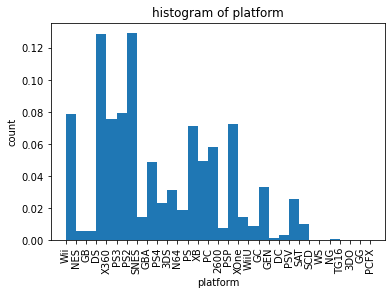

In [174]:
#Посмотрим, какие платформы были наиболее популярны среди разработчиков игр
plt.hist(df['platform'], density=True, bins=30)
plt.title('histogram of platform')
plt.xticks(rotation='vertical')
plt.ylabel('count')
plt.xlabel('platform')

<AxesSubplot:xlabel='platform', ylabel='common_sales'>

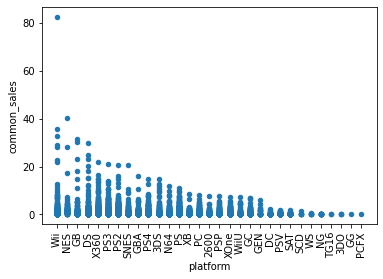

In [175]:
#Визуализируем график пересечения платформ и количества продаж
df.plot(x='platform', y='common_sales', kind='scatter', rot=90) 

Wii был очень популярен в определенном году, это не значит, что он в целом был популярнее остальных платформ. Чтобы посмотреть общую популярность платформ, подойдем к визуализации иначе.

In [176]:
#Выведем сводную таблицу с платформами и суммой продаж за все время. Отсортируем ее
df_pivot = df.pivot_table(index=['platform'], values='common_sales', aggfunc='sum').sort_values(by='common_sales', ascending=False)

#Сбросим индекс и посмотрим на результат
df_pivot.reset_index(inplace = True)
df_pivot

,platform,common_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.10
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


<AxesSubplot:xlabel='platform'>

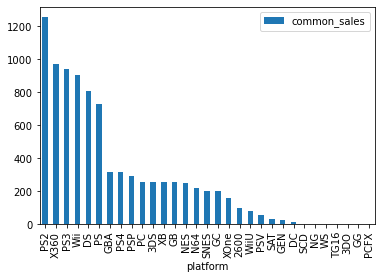

In [177]:
#Визуализируем полученную таблицу
df_pivot.plot(x='platform', y='common_sales', kind='bar', rot=90) 

Из 31 платформы сильнее всего по популярности выделяются шестеро: 

In [178]:
#Напечатаем 6 наиболее популярных платформ
top_platforms = df_pivot['platform'].head(6).values
print('Наиболее популярные платформы:', top_platforms)

Наиболее популярные платформы: ['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS']


Выберем наиболее популярные платформы и построим распределение по годам.

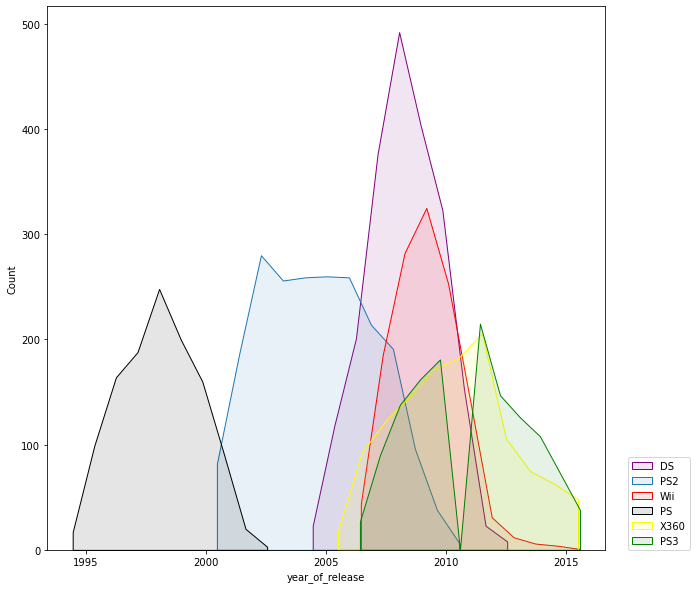

In [179]:
#Построим отдельные гистограммы для каждой платформы
plt.figure(figsize=(10,10))
sns.histplot(df[df['platform'] == 'DS']['year_of_release'], element="poly", color="purple", alpha=0.1, bins=10)
sns.histplot(df[df['platform'] == 'PS2']['year_of_release'], element="poly", alpha=0.1, bins=12)
sns.histplot(df[df['platform'] == 'Wii']['year_of_release'], element="poly", color="red", alpha=0.1, bins=11)
sns.histplot(df[df['platform'] == 'PS']['year_of_release'], element="poly", color="black", alpha=0.1, bins=10)
sns.histplot(df[df['platform'] == 'X360']['year_of_release'], element="poly", color="yellow", alpha=0.1, bins=11)
sns.histplot(df[df['platform'] == 'PS3']['year_of_release'], element="poly", color="green", alpha=0.1, bins=12)

plt.legend(['DS', 'PS2', 'Wii', 'PS', 'X360', 'PS3'], loc=(1.04,0))

Здесь мы видим распределение игр в зависимости от платформ по годам. Игры на платформе 'PS' были популярны с конца девятостых до начала нулевых, пока не появилась 'PS2'. Затем практически одновременно появляются другие платформы: 'DS', 'X360', 'PS3', 'Wii', которые сменяют друг друга, пока не остаются 'PS3' и 'X360'. Разумеется, они к настоящему времени тоже сдают позиции платформам, которых мы здесь не видим.

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы

In [180]:
#Построим сводную таблицу с первым и последним годом релизов игр у кждой платформы, посчитаем разницу во времени
platform_years = df.pivot_table(index=['platform'], values='year_of_release', aggfunc={'min', 'max'}).reset_index()
platform_years['delta'] = platform_years['max'] - platform_years['min']
platform_years

,platform,max,min,delta
0,2600,1989,1980,9
1,3DO,1995,1994,1
2,3DS,2016,2011,5
3,DC,2008,1998,10
4,DS,2013,2004,9
5,GB,2001,1988,13
6,GBA,2007,2000,7
7,GC,2007,2001,6
8,GEN,1994,1990,4
9,GG,1992,1992,0


Конечно же, если последняя игра вышла давно, это не значит, что платформа уже не выпускается и никто ею не пользуется, но все-таки это показатель, что жизненный цикл платформы подходит к концу.

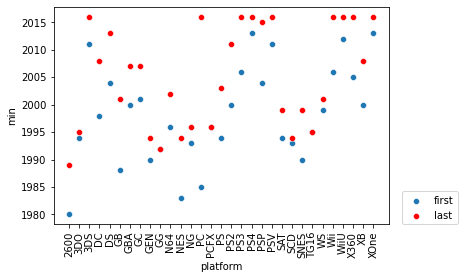

In [181]:
#Визуализируем первый и последний год выхода игры к платформам. Первый год будет синей точкой, последний - красной.
sns.scatterplot(data=platform_years, x="platform", y="min")
sns.scatterplot(data=platform_years, x="platform", y="max", color="red")
plt.xticks(rotation='vertical')
plt.legend(['first', 'last'], loc=(1.04,0))

<AxesSubplot:xlabel='platform'>

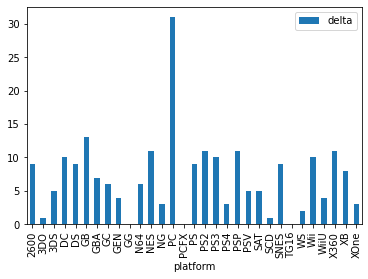

In [182]:
#Визуализируем разницу времени между первым и последним релизом
platform_years.plot(x='platform', y='delta', kind='bar', rot=90) 

Посчитаем среднюю продолжительность жизненного цикла популярных и обычным платформ

In [183]:
print('Средняя продолжительность жизненного цикла популярных платформ', platform_years[platform_years['platform'].isin(top_platforms)]['delta'].mean())
print('Средняя продолжительность жизненного цикла остальных платформ', platform_years[~platform_years['platform'].isin(top_platforms)]['delta'].mean())

Средняя продолжительность жизненного цикла популярных платформ 10.0
Средняя продолжительность жизненного цикла остальных платформ 6.28


Правда, здесь у платформ, которые все еще актуальны, цифра будет занижена, ведь они еще не достигли конца своего жизненного цикла. Разница существенна. Очевидно, из-за множества короткоживущих платформ.

Нечто подобное мы уже видели на одной из первых гистограмм, только теперь изучаем вопрос более предметно. Длительность жизненного цикла мы видим во второй гистограмме, а конкретные годы первого и последнего релиза - на первой. Некоторые платформы пользовались спросом у игроделов совсем не долго, например, GG, PCFX и TG16 - всего 1 год. Если красная точка находится в верху поля, значит она все еще актуальна. Если много ниже - уже давно потеряла актальность. Жизненный цикл большинства платформ составляет от 5 до 10 лет.

Выделим актуальный период, который в дальнейшем будем изучать отдельно. По самой первой гистограмме это с 2011 до 2016 годы, так как в этот период характер гистограммы резко меняется, учитывать предыдущие годы уже нет смысла. Но учитывая инновационность отрасли, актуальным периодом можно выбрать последние 2-3 года, то есть с 2014 года.

In [184]:
#Отделим новый набор данных с датами релиза от 2014 включительно
actual_data = df[df['year_of_release'] >= 2014]

#Проверим результат
actual_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
11522,Sherlock Holmes: Crimes & Punishments,XOne,2014,Adventure,0.03,0.04,0.00,0.01,<NA>,<NA>,Not,0.08
1055,No Man's Sky,PS4,2016,Action,0.63,0.76,0.03,0.27,71,45,T,1.69
6180,Alien: Isolation,X360,2014,Shooter,0.15,0.10,0.00,0.02,<NA>,82,M,0.27
5008,FIFA 17,X360,2016,Sports,0.07,0.28,0.00,0.03,<NA>,17,E,0.38
12366,Mirror's Edge Catalyst,PC,2016,Platform,0.01,0.05,0.00,0.00,74,44,T,0.06


Выберем несколько наиболее потенциально прибыльных платформ

<AxesSubplot:xlabel='platform'>

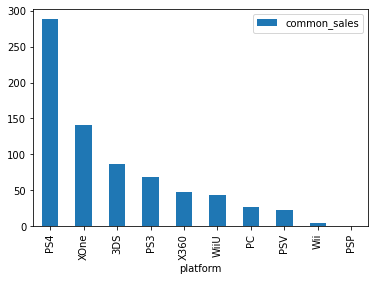

In [185]:
#Выведем сводную таблицу с платформами и суммой продаж за все время. Отсортируем ее
actual_data_pivot = actual_data.pivot_table(index=['platform'], values='common_sales', aggfunc='sum').sort_values(by='common_sales', ascending=False)

#Сбросим индекс
actual_data_pivot.reset_index(inplace = True)

#Визуализируем полученную таблицу
actual_data_pivot.plot(x='platform', y='common_sales', kind='bar', rot=90) 

Казалось бы, что может быть актуальнее персонального компьютера? Но сухие цифры говорят, что по количеству проданных копий игр это не самая популярная платформа. Выберем 8 лидирующих платформ и изучим, как меняются их продажи игр за актуальный период.

In [186]:
#Напечатаем 6 наиболее популярных актуальных платформ
actual_top_platforms = actual_data_pivot['platform'].head(8).values
print('Наиболее популярные актуальные платформы:', actual_top_platforms)

Наиболее популярные актуальные платформы: ['PS4' 'XOne' '3DS' 'PS3' 'X360' 'WiiU' 'PC' 'PSV']


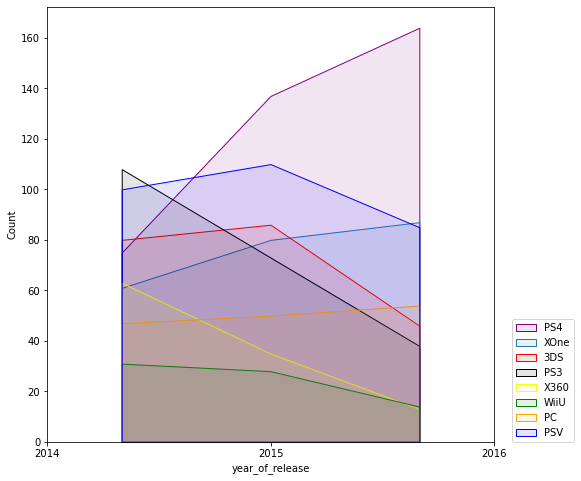

In [187]:
#Построим отдельные гистограммы для каждой платформы
plt.figure(figsize=(8,8))
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[0]]['year_of_release'], element="poly", color="purple", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[1]]['year_of_release'], element="poly", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[2]]['year_of_release'], element="poly", color="red", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[3]]['year_of_release'], element="poly", color="black", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[4]]['year_of_release'], element="poly", color="yellow", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[5]]['year_of_release'], element="poly", color="green", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[6]]['year_of_release'], element="poly", color="orange", alpha=0.1, bins=3)
sns.histplot(actual_data[actual_data['platform'] == actual_top_platforms[7]]['year_of_release'], element="poly", color="blue", alpha=0.1, bins=3)

plt.xticks([2014, 2015, 2016])
plt.legend([actual_top_platforms[0], actual_top_platforms[1], actual_top_platforms[2], actual_top_platforms[3], actual_top_platforms[4], actual_top_platforms[5], actual_top_platforms[6], actual_top_platforms[7]], loc=(1.04,0))

Здесь мы видим динамику количества релизов за последние годы. К сожалению мы не можем здесь увидеть динамику продаж, у нет таких данных, но мы помним, что это лидеры по продажам за все время. Значит, молодые платформы могут сейчас иметь очень хорошую динамику по продажам.
* PS4 и XOne каждый год увеличивают количество релизов. Очень хорошая динамика
* Положительная динамика также у PC
* Остальные показывают отрицательную динамику

Построим ящик с усами глобальных продаж каждой платформы, чтобы узнать их количество глобальных продаж.

(0.0, 2.0)

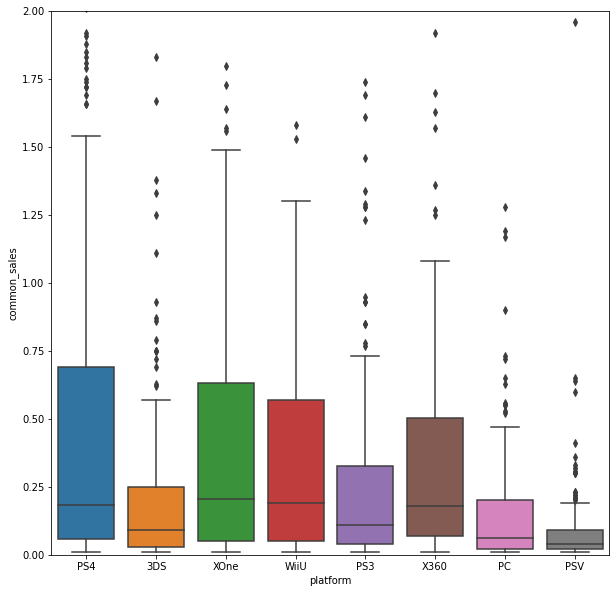

In [188]:
#Построим ящик с усами для выбранных ранее платформ
plt.figure(figsize=(10,10))
sns.boxplot(y="common_sales", x="platform", data=actual_data[actual_data.platform.isin(actual_top_platforms)])
plt.ylim(0, 2)

График сильно растянут всвязи с множеством выбросов, но мы его обрезали. Как мы помним, в настоящий момент (2016 год) популярность среди игроделов набирают PS4 и XOne. Сдесь они тоже имеют неплохие показатели. X360 здесь в лидерах за счет прошлых лет, у него сейчас плохая динамика.

У WiiU тоже хорошие цифры, хотя на графике по релизам и кажется, что она постепенно теряет позиции. Но учитывая, что здесь по медианной линнии она на уровне с XOne и PS4, можно делать вывод, что игры на WiiU более качественные, хоть их и меньше ко количеству.

Посмотрим, как внутри одной платформы коррелируют отзывы и продажи. Выберем PS4

<AxesSubplot:xlabel='user_score', ylabel='common_sales'>

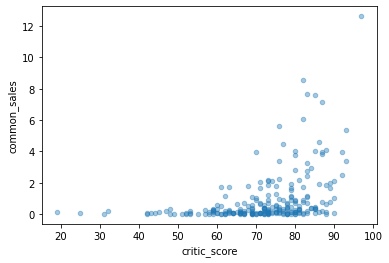

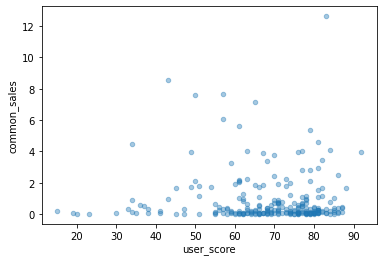

In [189]:
#Построим диаграмму рассеяния между оценками критиков и числом продаж игр, и отдельно оценок пользователей и продаж
actual_data[actual_data['platform'] == 'PS4'].plot(x='critic_score', y='common_sales', kind='scatter', alpha=0.4) 
actual_data[actual_data['platform'] == 'PS4'].plot(x='user_score', y='common_sales', kind='scatter', alpha=0.4) 

Вычислим численные значения корреляции

In [190]:
#Напечатаем корреляцию между оценками критиков и продажами, затем оценками пользователей и продажами
print('Корреляция между оценками критиков и продажами для PS4: {:.2f}'.format(actual_data[actual_data['platform'] == 'PS4']['critic_score'].astype(float).corr(actual_data[actual_data['platform'] == 'PS4']['common_sales'])))
print('Корреляция между оценками пользователей и продажами для PS4: {:.2f}'.format(actual_data[actual_data['platform'] == 'PS4']['user_score'].astype(float).corr(actual_data[actual_data['platform'] == 'PS4']['common_sales'])))

Корреляция между оценками критиков и продажами для PS4: 0.40
Корреляция между оценками пользователей и продажами для PS4: -0.04


Конечно, у большинства игр продажи находятся на низком уровне независимо от оценок. Но некоторым удается поднять число продаж со дна, и чем больше оценка критиков, тем больше вероятность получить большое количество продаж. Вот что значит оценка профессионалов. С оценкой пользователей все иначе, хоть визуально определенная корреляция есть, но здесь она меньше, а численно она и вовсе околонулевая.

Скорее всего у других платформ примерно такая же ситуация. Проверим это на примере XOne.

<AxesSubplot:xlabel='user_score', ylabel='common_sales'>

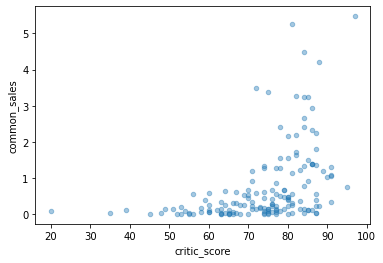

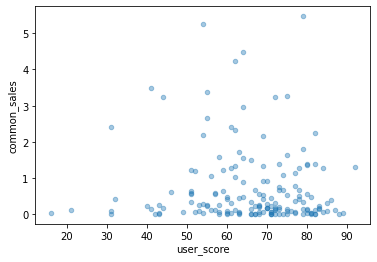

In [191]:
#Построим диаграмму рассеяния между оценками критиков и числом продаж игр, и отдельно оценок пользователей и продаж
actual_data[actual_data['platform'] == 'XOne'].plot(x='critic_score', y='common_sales', kind='scatter', alpha=0.4) 
actual_data[actual_data['platform'] == 'XOne'].plot(x='user_score', y='common_sales', kind='scatter', alpha=0.4) 

In [192]:
#Напечатаем корреляцию между оценками критиков и продажами, затем оценками пользователей и продажами
print('Корреляция между оценками критиков и продажами для XOne: {:.2f}'.format(actual_data[actual_data['platform'] == 'XOne']['critic_score'].astype(float).corr(actual_data[actual_data['platform'] == 'XOne']['common_sales'])))
print('Корреляция между оценками пользователей и продажами для XOne: {:.2f}'.format(actual_data[actual_data['platform'] == 'XOne']['user_score'].astype(float).corr(actual_data[actual_data['platform'] == 'XOne']['common_sales'])))

Корреляция между оценками критиков и продажами для XOne: 0.43
Корреляция между оценками пользователей и продажами для XOne: -0.07


Да, так и есть.

Изучим распределение продаж по различным жанрам.

<AxesSubplot:xlabel='genre'>

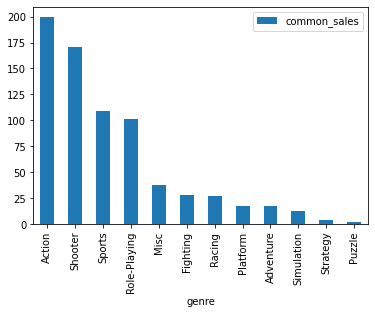

In [193]:
#Выведем сводную таблицу с жанрами и суммой продаж за все время. Отсортируем ее
actual_data_pivot = actual_data.pivot_table(index=['genre'], values='common_sales', aggfunc='sum').sort_values(by='common_sales', ascending=False)

#Сбросим индекс
actual_data_pivot.reset_index(inplace = True)

#Визуализируем полученную таблицу
actual_data_pivot.plot(x='genre', y='common_sales', kind='bar', rot=90) 

In [194]:
print('Наиболее популярные актуальные платформы:', actual_data_pivot['genre'].head(5).values)

Наиболее популярные актуальные платформы: ['Action' 'Shooter' 'Sports' 'Role-Playing' 'Misc']


Особенно выделяются экшен и шутеры, спортивные и ролевые игры. Конечно, разделение по жанрам у многих игр условное, сложно порой сделать четкое разделение. Но определенные выводы сделать можно. 

К примеру, глядя на эту гистограмму можно понять, что жанр стратегий определенно нельзя назвать очень популярным, как и приключения и паззлы. А вот шутеры и экшены - практически беспроигрышный вариант для игроделов.

## Портрет пользователя каждого региона

Определим для каждого региона некоторые показатели. Сперва выделим самые популярные платформы регионов.

In [195]:
#Выведем сводную таблицу с платформами и суммой продаж
df_pivot = actual_data.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')

#Сбросим индекс и посмотрим на результат
df_pivot.reset_index(inplace = True)
df_pivot

,platform,eu_sales,jp_sales,na_sales,other_sales
0,3DS,16.12,44.24,22.64,3.68
1,PC,17.97,0.00,7.23,1.85
2,PS3,25.54,11.22,22.05,9.37
3,PS4,130.04,15.02,98.61,44.48
4,PSP,0.00,0.36,0.00,0.00
5,PSV,3.53,14.54,2.52,1.81
6,Wii,2.59,0.00,2.08,0.40
7,WiiU,13.15,7.31,19.36,3.16
8,X360,15.49,0.08,28.30,4.35
9,XOne,46.25,0.32,81.27,12.52


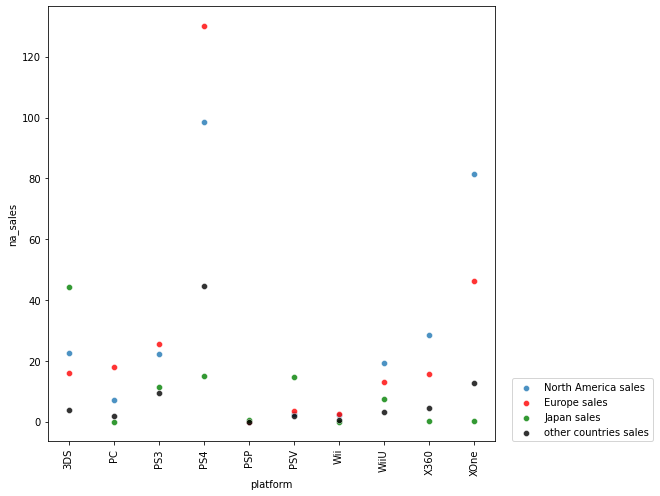

In [196]:
#Визуализируем полученную таблицу
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pivot, x="platform", y="na_sales", alpha=0.8)
sns.scatterplot(data=df_pivot, x="platform", y="eu_sales", color="red", alpha=0.8)
sns.scatterplot(data=df_pivot, x="platform", y="jp_sales", color="green", alpha=0.8)
sns.scatterplot(data=df_pivot, x="platform", y="other_sales", color="black", alpha=0.8)

plt.xticks(rotation='vertical')
plt.legend(["North America sales", "Europe sales", "Japan sales", "other countries sales"], loc=(1.04,0))

Возможно, не самый удачный метод - соединять все четыре региона в один график. Для упрощения восприятия разделим графики.

In [197]:
df_pivot.sort_values(by='na_sales', ascending=False).head(5)

,platform,eu_sales,jp_sales,na_sales,other_sales
3,PS4,130.04,15.02,98.61,44.48
9,XOne,46.25,0.32,81.27,12.52
8,X360,15.49,0.08,28.30,4.35
0,3DS,16.12,44.24,22.64,3.68
2,PS3,25.54,11.22,22.05,9.37


In [198]:
#Объявим функцию чтобы немного сократить код
def top5(data_d, column):
    return data_d.sort_values(by=column, ascending=False).head()

<AxesSubplot:xlabel='platform'>

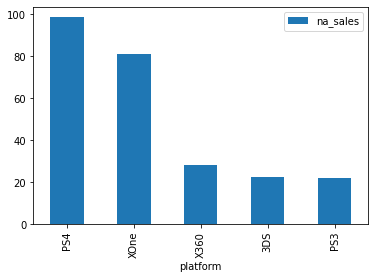

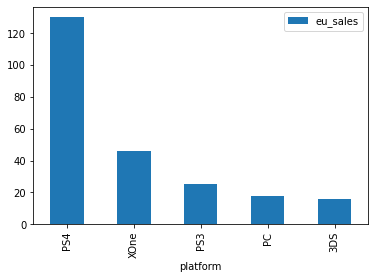

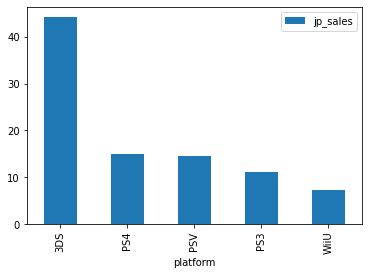

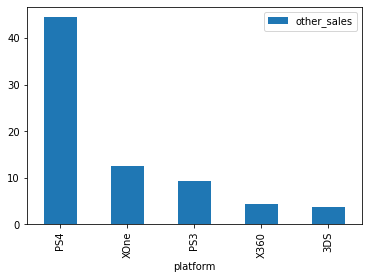

In [199]:
#Визуализируем отдельные столбчатые графики
top5(df_pivot, 'na_sales').plot(x='platform', y='na_sales', kind='bar', rot=90)
top5(df_pivot, 'eu_sales').plot(x='platform', y='eu_sales', kind='bar', rot=90) 
top5(df_pivot, 'jp_sales').plot(x='platform', y='jp_sales', kind='bar', rot=90) 
top5(df_pivot, 'other_sales').plot(x='platform', y='other_sales', kind='bar', rot=90) 

В целом видно, что популярная в одном регионе платформа будет популярной и в другом (кроме Японии). Чтобы проверить это, выведем напрямую топ-5 платформ каждого региона. 

In [200]:
#Напечатаем топ-5 платформ каждого региона в текстовом виде
print('Топ-5 платформ в Северной Америке', top5(df_pivot, 'na_sales')['platform'].values)
print('Топ-5 платформ в Европе', top5(df_pivot, 'eu_sales')['platform'].values)
print('Топ-5 платформ в Японии', top5(df_pivot, 'jp_sales')['platform'].values)
print('Топ-5 платформ в других странах', top5(df_pivot, 'other_sales')['platform'].values)

Топ-5 платформ в Северной Америке ['PS4' 'XOne' 'X360' '3DS' 'PS3']
Топ-5 платформ в Европе ['PS4' 'XOne' 'PS3' 'PC' '3DS']
Топ-5 платформ в Японии ['3DS' 'PS4' 'PSV' 'PS3' 'WiiU']
Топ-5 платформ в других странах ['PS4' 'XOne' 'PS3' 'X360' '3DS']


Посмотрим на долю продаж игр по платформам в виде круговых диаграмм

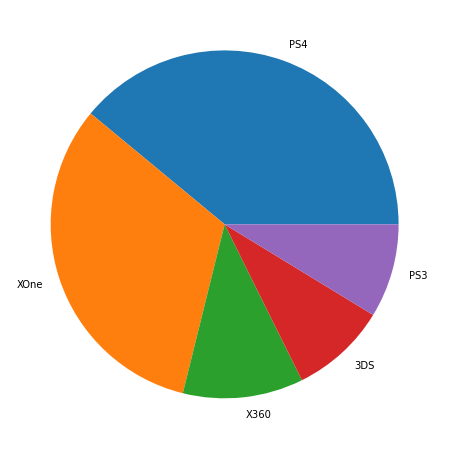

In [201]:
#Построим круговую диаграмму продаж игр на разных платформах в Северной Америке
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'na_sales')['na_sales'], labels = top5(df_pivot, 'na_sales')['platform'])
plt.show()

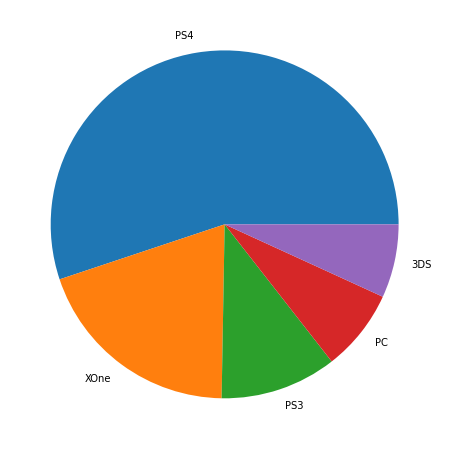

In [202]:
#Построим круговую диаграмму продаж игр на разных платформах в Европе
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'eu_sales')['eu_sales'], labels = top5(df_pivot, 'eu_sales')['platform'])
plt.show()

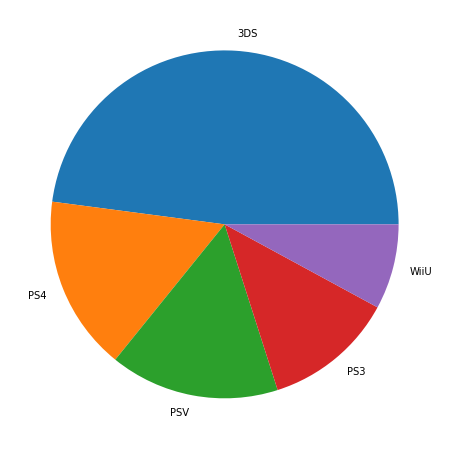

In [203]:
#Построим круговую диаграмму продаж игр на разных платформах в Японии
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'jp_sales')['jp_sales'], labels = top5(df_pivot, 'jp_sales')['platform'])
plt.show()

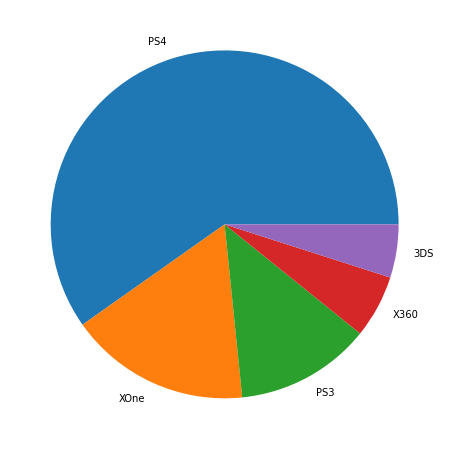

In [204]:
#Построим круговую диаграмму продаж игр на разных платформах в других странах
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'other_sales')['other_sales'], labels = top5(df_pivot, 'other_sales')['platform'])
plt.show()

У рынков, кроме японского рынка, схожие предпочтения. 'PS4' и 'XOne' являются в трех регионах из четырех абсолютными лидерами.

Выделим самые популярные жанры различных регионов.

In [205]:
#Выведем сводную таблицу с платформами и суммой продаж
df_pivot = actual_data.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')

#Сбросим индекс и посмотрим на результат
df_pivot.reset_index(inplace = True)
df_pivot

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,74.68,29.58,72.53,22.57
1,Adventure,6.49,3.60,5.64,1.82
2,Fighting,6.69,6.37,12.43,2.73
3,Misc,12.86,5.61,15.05,4.03
4,Platform,6.80,2.69,6.79,1.81
5,Puzzle,0.52,0.93,0.65,0.11
6,Racing,14.13,1.76,8.74,2.89
7,Role-Playing,28.17,31.16,33.47,8.64
8,Shooter,65.52,4.87,79.02,21.53
9,Simulation,7.30,2.31,2.63,0.89


<AxesSubplot:xlabel='genre'>

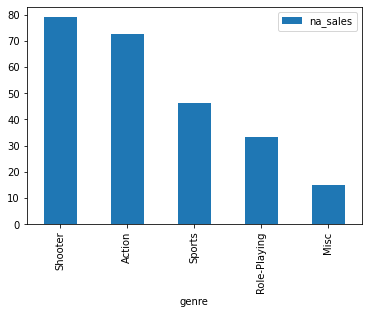

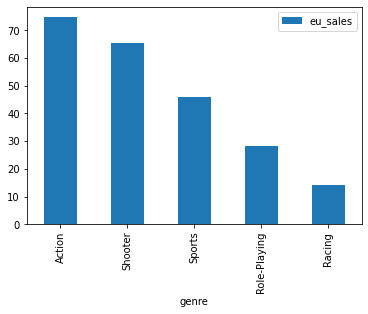

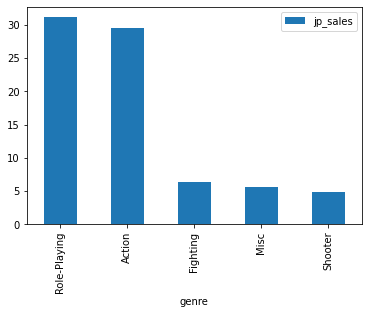

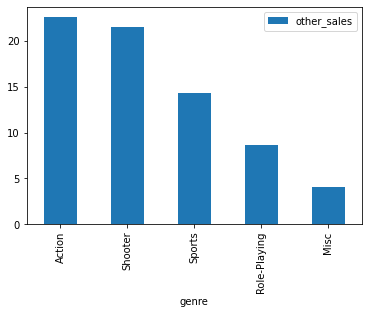

In [206]:
#Визуализируем отдельные столбчатые графики
top5(df_pivot, 'na_sales').plot(x='genre', y='na_sales', kind='bar', rot=90)
top5(df_pivot, 'eu_sales').plot(x='genre', y='eu_sales', kind='bar', rot=90) 
top5(df_pivot, 'jp_sales').plot(x='genre', y='jp_sales', kind='bar', rot=90) 
top5(df_pivot, 'other_sales').plot(x='genre', y='other_sales', kind='bar', rot=90)

In [207]:
#Выведем конкретный топ жанров
print('Топ-5 жанров в Северной Америке', top5(df_pivot, 'na_sales')['genre'].values)
print('Топ-5 жанров в Европе', top5(df_pivot, 'eu_sales')['genre'].values)
print('Топ-5 жанров в Японии', top5(df_pivot, 'jp_sales')['genre'].values)
print('Топ-5 жанров в других странах', top5(df_pivot, 'other_sales')['genre'].values)

Топ-5 жанров в Северной Америке ['Shooter' 'Action' 'Sports' 'Role-Playing' 'Misc']
Топ-5 жанров в Европе ['Action' 'Shooter' 'Sports' 'Role-Playing' 'Racing']
Топ-5 жанров в Японии ['Role-Playing' 'Action' 'Fighting' 'Misc' 'Shooter']
Топ-5 жанров в других странах ['Action' 'Shooter' 'Sports' 'Role-Playing' 'Misc']


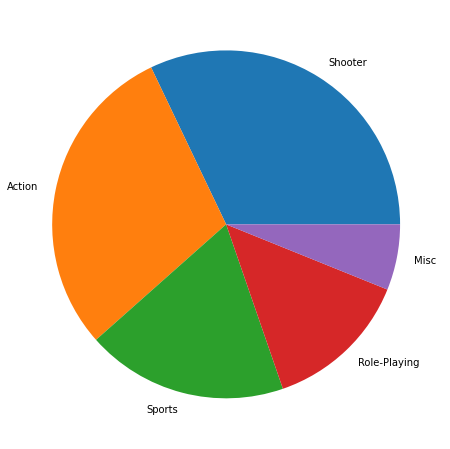

In [208]:
#Построим круговую диаграмму продаж игр с разными жанрами в Северной Америке
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'na_sales')['na_sales'], labels = top5(df_pivot, 'na_sales')['genre'])
plt.show()

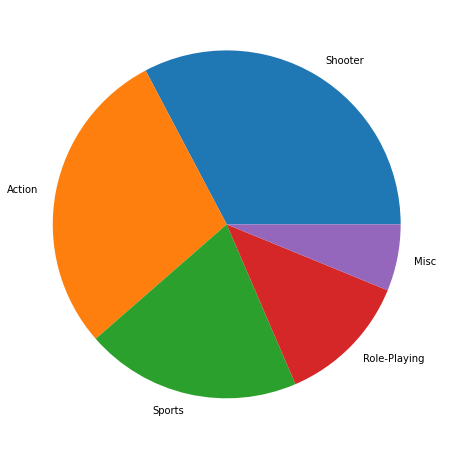

In [209]:
#Построим круговую диаграмму продаж игр с разными жанрами в Европе
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'eu_sales')['eu_sales'], labels = top5(df_pivot, 'na_sales')['genre'])
plt.show()

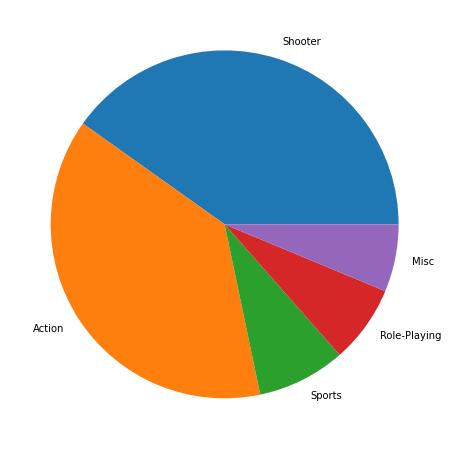

In [210]:
#Построим круговую диаграмму продаж игр с разными жанрами в Японии
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'jp_sales')['jp_sales'], labels = top5(df_pivot, 'na_sales')['genre'])
plt.show()

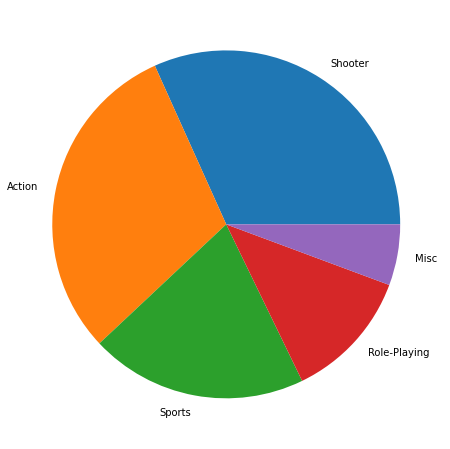

In [211]:
#Построим круговую диаграмму продаж игр с разными жанрами в других странах
plt.figure(figsize=(8,8))
plt.pie(top5(df_pivot, 'other_sales')['other_sales'], labels = top5(df_pivot, 'na_sales')['genre'])
plt.show()

В плане жанров у пользователей Северной Америки, Европы и других стран похожие вкусы, а вот у Японцев специфичны. Разве что они согласны с остальными в плане экшена.

Изучим связь между оценками ESRB и продажами в каждом регионе.

In [212]:
#Выведем сводную таблицу с рейтингами и средними продажами
df_pivot = actual_data.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='mean')

#Сбросим индекс и посмотрим на результат
df_pivot.reset_index(inplace = True)
df_pivot

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,0.265114,0.040822,0.231689,0.070274
1,E10+,0.141405,0.024108,0.179622,0.042324
2,M,0.352604,0.030226,0.363849,0.108189
3,Not,0.078705,0.075968,0.086409,0.024566
4,T,0.125720,0.054539,0.143727,0.041808


<AxesSubplot:xlabel='rating'>

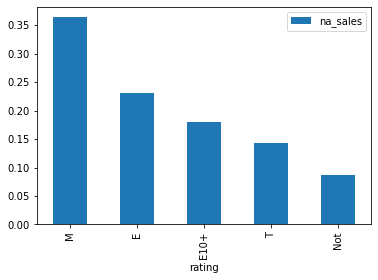

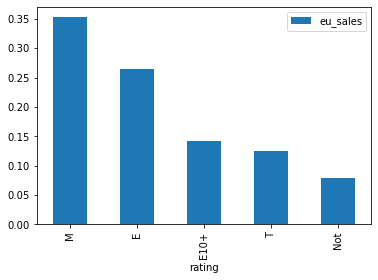

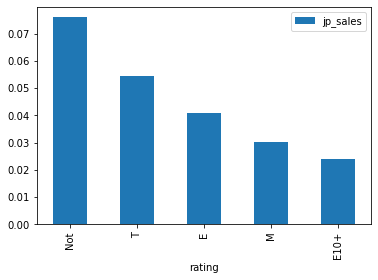

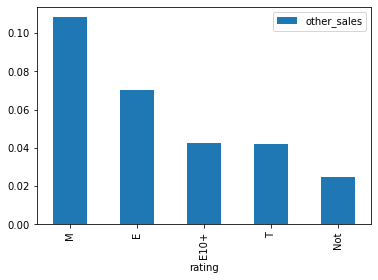

In [213]:

#Построим отдельные столбчатые графики
top5(df_pivot, 'na_sales').plot(x='rating', y='na_sales', kind='bar') 
top5(df_pivot, 'eu_sales').plot(x='rating', y='eu_sales', kind='bar') 
top5(df_pivot, 'jp_sales').plot(x='rating', y='jp_sales', kind='bar') 
top5(df_pivot, 'other_sales').plot(x='rating', y='other_sales', kind='bar') 

В целом во всех регионах связь рейтинга с числом продаж одинаковая. Только в Японии игры с жанром "М" реже имеют большие продажи. В других регионах игры с этим рейтингом порой продаются с бо'льшим успехом, как и игры с рейтингом "Е". 
Игры с рейтингом "Е10+" и "Т" имеют везде более скромные цифры, хотя последнее довольно популярно в Японии. У нас есть множество игр с неизвестным рейтингом, особоенно в японском рынке.

## Проверка гипотез



Проверим следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

### Первая гипотеза

Гипотеза звучит так: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Это двусторонняя гипозета. У нас есть данные с пользовательским рейтингом каждой игры, разделим их по платформам и таким образом получим две генеральные совокупности, которые мы должны сравнивать.

Нулевая гипотеза H₀ будет звучать так: средние рассматриваемых генеральных совокупностей равны между собой.

Альтернативная гипотеза H₁: средние рассматриваемых генеральных совокупностей не равны между собой.

Выберем уровень статистической значимости равный 0,05, это достаточно точный уровень для нашей цели. Мы помним, что наши данные не полные, поэтому применяем парамер equal_var равным True.

In [214]:
#критический уровень статистической значимости
alpha = 0.05

#Проводим тест
results = st.ttest_ind(\
    actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notnull())]['user_score'],\
    actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notnull())]['user_score'],\
    equal_var = True)

#Выведем ответ
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348478
Не получилось отвергнуть нулевую гипотезу


In [215]:
#Напечатаем редний пользовательский рейтинг игр чтобы убедиться в верности вывода
print('Средний пользовательский рейтинг игр на платформе Xbox One: {:.2f}'.format(actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notnull())]['user_score'].mean()))
print('Средний пользовательский рейтинг игр на платформе PC: {:.2f}'.format(actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notnull())]['user_score'].mean()))

Средний пользовательский рейтинг игр на платформе Xbox One: 65.95
Средний пользовательский рейтинг игр на платформе PC: 62.98


Не получилось отвергнуть нулевую гипотезу, скорее всего средний пользовательский рейтинг игр на этих платформах не отличается.

### Вторая гипотеза



Вторая гипотеза звучит так: средние пользовательские рейтинги жанров Action и Sports разные.

Это двусторонняя гипозета. У нас есть данные с пользовательским рейтингом каждой игры, разделим их по жанрам и таким образом получим две генеральные совокупности, которые мы должны сравнивать.

Нулевая гипотеза H₀ будет звучать так: средние рассматриваемых генеральных совокупностей равны между собой.

Альтернативная гипотеза H₁: средние рассматриваемых генеральных совокупностей не равны между собой.

In [216]:
#критический уровень статистической значимости
alpha = 0.05

#Проводим тест
results = st.ttest_ind(\
    actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'].notnull())]['user_score'],\
    actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'].notnull())]['user_score'],\
    equal_var = True)

#Выведем ответ
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.871114798510669e-19
Отвергаем нулевую гипотезу


In [217]:
#Напечатаем редний пользовательский рейтинг игр чтобы увидеть, средняя игр какого жанра больше, и на сколько
print('Средний пользовательский рейтинг игр жанра Action: {:.2f}'.format(actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'].notnull())]['user_score'].mean()))
print('Средний пользовательский рейтинг игр жанра Sports: {:.2f}'.format(actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'].notnull())]['user_score'].mean()))

Средний пользовательский рейтинг игр жанра Action: 67.61
Средний пользовательский рейтинг игр жанра Sports: 52.25


Нулевая гипотеза отвергнута. Средние пользовательских рейтингов игр жанров Action и Sports различаются. Игры жанра Action более популярны.

## Общий вывод

Мы проанализировали набор данных о продажах и рейтингах компьютерных игр за период с 1980 по 2016 годы. 

За весь период пик по количеству вышедших игр приходится конец двухтысячных, затем рынок упал на половину и держит стабильные показатели. 

За весь период наиболее популярные игры по количеству продаж поддерживаются платформами 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Но за актуальный период (с 2011 года) - 'PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU'. Всвязи с развитием техники, сменилось поколение игровых консолей, большинство консолей актуальны не более 10 лет. В настоящее время (конец 2016 года) набирают популярность среди разработчиков игр консоли PS4 и XOne, PC. Игры на платформах PS4 и XOne показывают хороший показатель по продажам. Игры в WiiU, учитывая возраст, тоже имеют неплохие продажи. PS4 и XOne также входят в число наиболее популярных платформ в Северной Америке, Европе и других странах, кроме Японии. Японский рынок специфичен, PS4 там занимает лишь пятое место по популярности, а XOne и вовсе не входит в Топ-5.

Если нужно оценить, "выстрелит" ли игра, можно узнать мнение экспертов, их оценка имеет определенную корреляцию с продажами, но многие игры с высокими оценками так и не были проданы с высоким тиражом, так что с этим стоит быть осторожнее.

Что касается жанров, наиболее популярны по прдажам игры жанров 'Action', 'Shooter', 'Role-Playing', 'Sports' и 'Misc'. Action популярен абсолютно везде. Шутеры и спортивные симуляторы везде, кроме Японии. Ролевые игры тоже популярны, особенно в Японии. Жанр Misc также в целом довольно популярен везде, кроме Европы.

В плане возрастного рейтинга продажи игр различаются в основном в Японии и в остальном мире. В Японии наиболее популярны игры с рейтингом "Т" и "Е", а в остальном мире - "М" и "Е". Различия в средних цифрах не так существенны, максимум в 2-3 раза между лидером и оутсайдером.

Мы математически проверили несколько гипотез и выяснили, что скорее всего средний пользовательский рейтинг игр на платформах Xbox One и PC не отличается. А также, что средние пользовательских рейтингов игр жанров Action и Sports разные. Игры жанра Action более популярны.